In [2]:
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import shap
import numpy as np
import scipy.stats as stats
# from sklearn.inspection import plot_partial_dependence


import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, r2_score
# Loading dataset

import sys
from pathlib import Path

# Adjust the system path to include the project root directory. 
# It assumes the notebook is inside 'scripts/model_hyperparameter_tuning'.
project_root = Path.cwd().parents[1]
sys.path.insert(0, str(project_root))

# Import the project configuration settings.
import config
from config import RANDOM_SEED
config.set_seed()

# Loading training data
X_test = config.load_data('X_test_regression_WAITTIME.csv', 'test')
y_test = config.load_data('y_test_regression_WAITTIME.csv', 'test')

# Loading preprocessed data
X_test_preprocessed = config.load_data('X_test_preprocessed_regression_WAITTIME.csv', 'processed')

# Load the entire dataset as a DataFrame
X_test_selected_features = config.load_data('X_test_selected_features_WAITTIME.csv', 'test').sort_index(axis=1)



In [3]:
# Define the paths for the model and test data
model_name = 'best_waittime_regression_model_with_all_features.joblib'
# Load the trained model using the utility function from config.py
model = config.load_model(model_name)
print("Model loaded successfully.")

# Evaluate the model on the test data for all features
y_pred = model.predict(X_test_preprocessed)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) on Test Data: {round(mae, 2)}")
print(f"R-squared on Test Data: {round(r2, 2)}")

Model loaded successfully.
Mean Absolute Error (MAE) on Test Data: 13.58
R-squared on Test Data: 0.38


In [4]:
# Define the paths for the model and test data
model_name = 'best_waittime_regression_model_with_top_features.joblib'
# Load the trained model using the utility function from config.py
model = config.load_model(model_name)
print("Model loaded successfully.")

# Now, make the prediction
y_pred = model.predict(X_test_selected_features)

# Calculate and print the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on Test Data: {round(mae, 2)}")
print(f"R-squared on Test Data: {round(r2, 2)}")

Model loaded successfully.
Mean Absolute Error (MAE) on Test Data: 13.52
R-squared on Test Data: 0.38


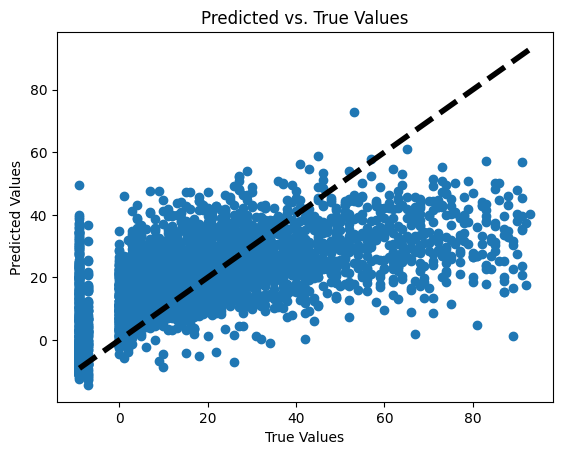

In [5]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


In [9]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test_preprocessed)

# Summary plot
shap.summary_plot(shap_values, X_test_preprocessed)


[LightGBM] [Fatal] The number of features in data (391) is not the same as it was in training data (20).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.


LightGBMError: The number of features in data (391) is not the same as it was in training data (20).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.